<a href="https://colab.research.google.com/github/Sukantanath108/Data-Science-and-ML-journey/blob/main/polynomial_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE :
## *This is a single feature polynomial regression problem.Normally in real world problem, you get multiple features*

# import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Import database

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values # doing this for testing the linear reg first by taking only the numerical column
y = dataset.iloc[:, -1].values

In [43]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Using linear regression model

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [72]:

y_hat = lin_reg.predict(X)

# Plot the graph for training set

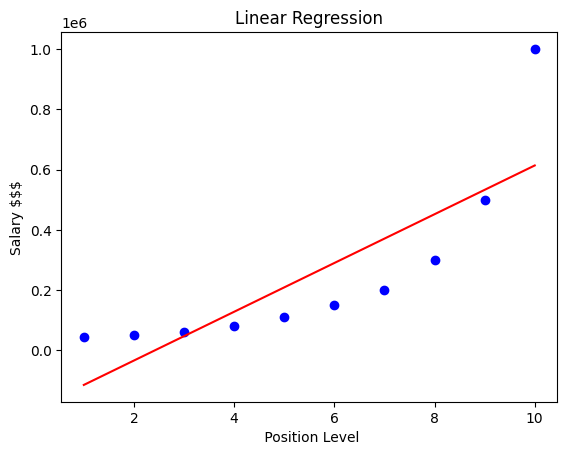

In [73]:
plt.scatter(X , y , color = "blue")
plt.plot(X , y_hat , color = "red")
plt.title("Linear Regression")
plt.xlabel(" Position Level")
plt.ylabel("Salary $$$")
plt.show()

In [85]:
from sklearn.preprocessing import PolynomialFeatures #imported the class
poly_reg = PolynomialFeatures(degree=4) #making an object and poly degree can be changed
X_poly = poly_reg.fit_transform(X) #transforming the data & X only has the 2nd numerical column
lin_reg_new = LinearRegression()
lin_reg_new.fit(X_poly , y) #merging non-linear datasets into Linear reg making polynomial reg..also linear reg doest have transform method



LinearRegression()

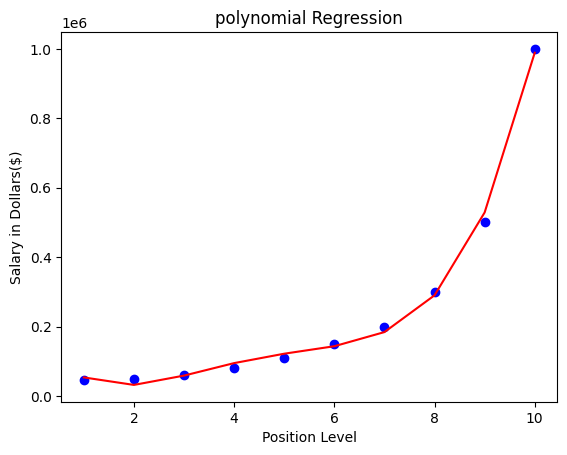

In [86]:
plt.scatter(X , y , color = "blue")
plt.plot(X, lin_reg_new.predict(X_poly) , color = "red") #normally i would have used y_hat = lin_reg_new.predict(X_poly) which is the predicted polynomial value
plt.title("polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary in Dollars($)")
plt.show()

# changed the degree vlue form 2 to 5 and it seems a perfect fit..changes form 5 to 9/10 or higher values doesnt change the graph (unnecessary)

# But for a smoother curve

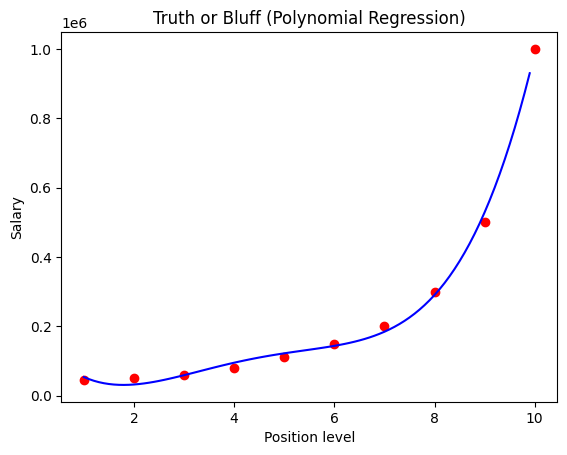

In [87]:
X_grid = np.arange(min(X), max(X), 0.1) # creates finer grid by a step of 0.1 like learning rate
X_grid = X_grid.reshape((len(X_grid), 1)) # reshapes into a column vector as poly reg model expects a 2D array as input
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_new.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Predicting new results for linear model

In [82]:
lin_reg.predict([[6.5]]) # the first[] represents row and 2nd [- [] - ] shows column
# this is a 1 X 1 array
# lin_reg.predict([[7.5,2]])
# this is a 1 X 2 array
# lin_reg.predict([ [7.5,2] , [2,3] ])
# this is an array of 2 rows,2col

array([330378.78787879])

# a man asked for  160K dollars
# but the linear model gave us the value to be 330K$ per annum.
# ***Thus*** we predicted way over what he wanted **( he won xD ).**

# Predicting new results for polynomial model

In [90]:
# lin_reg_new.predict(poly_reg.fit_transform([6.5]))
# this shows error -----Expected 2D array, got 1D array instead
lin_reg_new.predict(poly_reg.fit_transform([[6.5]]))

# we cant write 6.5 then 6.5**2 6.5**3 like the poly reg eq bx1 + bx1**2 + .....
# thus we ue the fit_transform
# the poly_reg object got transformed into a matrix of X with several feature powers ( bx1 + bx1**2 + ..... x* xn **n)

array([158862.45265155])

# The man wanted 160K and our poly model predicted around 158K
good accuracy